In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers
from keras import regularizers

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's see the correlations between the output variable we want which is the 'Class' variable, where 1 stands for fraudulent transactions and 0 otherwise.

In [4]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [5]:
df.shape

(284807, 31)

In [6]:
X = df.drop(columns = ['Class'])
y = df['Class']

Let's standarize the data as we are going to use neural networks

In [7]:
X = (X - X.mean())/X.std()

In [8]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,0.326117,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.680974,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.269855,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,0.529938,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641929,-6.065831,6.099275,-6.486233,-1.459638,-3.886604,-1.956687,-3.975621,6.116562,1.742556,...,1.914361,0.290602,0.154146,1.624571,-0.840999,2.756316,0.518499,2.337897,2.495525,-0.350150
284803,1.641950,-0.374121,-0.033356,1.342142,-0.521651,0.629039,0.794444,0.019667,0.246886,0.532298,...,0.077330,0.291625,1.273779,0.019958,-1.677917,-1.163724,-0.819645,0.169641,-0.162163,-0.254116
284804,1.641971,0.980022,-0.182433,-2.143201,-0.393983,1.905830,2.275258,-0.239939,0.593139,0.393630,...,0.001811,0.315912,0.796786,-0.060053,1.056942,0.509796,-0.181181,0.011037,-0.080467,-0.081839
284805,1.641971,-0.122755,0.321250,0.463319,0.487192,-0.273836,0.468154,-0.554671,0.568630,0.356886,...,0.165299,0.361111,1.102449,-0.261503,0.203427,-1.091853,1.133633,0.269604,0.316686,-0.313248


In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [10]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
134955,-0.289901,0.585172,-0.050849,0.397666,0.512343,-0.287110,0.139818,-0.257494,0.155136,0.329853,...,-0.201385,-0.016408,0.302210,-0.109170,0.128461,0.926178,0.935992,-0.006876,-0.010676,-0.341354
84470,-0.726305,-0.468705,0.350476,0.770424,-0.608936,0.702239,0.363269,0.770701,0.157836,-0.788907,...,0.135170,0.140167,0.100895,-0.519486,-1.864760,1.194184,0.820252,-0.105357,0.099161,-0.062448
176085,0.585539,-1.027774,-1.975076,-0.952304,0.105453,1.981104,-1.180425,0.307911,-0.049359,0.608666,...,1.787256,0.542773,0.007890,2.645955,0.224737,-3.270970,-1.083756,-0.077810,0.738517,1.197226
79348,-0.775664,-0.391757,0.232188,0.139102,0.025007,0.042903,0.915985,-0.043138,0.601321,-1.771066,...,-0.083426,-0.198040,-0.167885,-0.038251,-2.913742,-0.115764,-0.167142,0.725431,0.340731,0.068729
63554,-0.927450,-0.417537,0.982073,0.601134,0.922171,-0.291314,0.774479,-1.594578,-4.263780,-1.429956,...,1.686347,-3.992496,-0.715890,0.311030,0.228881,1.473746,-1.203060,0.067826,0.648314,-0.239483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.404224,0.599117,0.061038,0.323503,0.326016,-0.214727,-0.160001,-0.133583,0.099821,-0.103946,...,-0.204344,-0.253262,-0.791348,0.258472,-0.010138,0.175424,0.226521,-0.051835,0.012020,-0.345313
259178,1.351624,-0.396172,0.087217,-0.753434,-0.876574,1.405805,2.936396,-0.376776,1.139211,0.364723,...,-0.383604,0.050479,-0.026974,0.387263,1.127422,-3.136731,-1.598709,0.163530,0.415215,0.003520
131932,-0.316265,-0.074850,0.601309,1.005498,0.343092,0.253076,-0.611886,0.870298,-0.330988,-0.447195,...,0.009281,0.071678,0.487926,-0.466319,0.665155,0.455387,-0.826306,-0.300123,-0.594381,-0.337476
146867,-0.144938,-1.505409,1.426050,-1.662782,-2.683092,1.352151,2.047403,-0.381353,1.856685,0.528111,...,0.541422,-0.453027,-1.443451,0.229520,1.120899,0.613319,0.884042,1.231100,1.017385,-0.349231


In [11]:
X_train.shape

(190820, 30)

# First model

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (30,)))
model.add(layers.Dense(64, activation = 'relu')),
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy') 

In [13]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_X_train, partial_y_train, epochs = 40, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9965 - val_loss: 0.0065 - val_accuracy: 0.9990
Epoch 2/40
354/354 [==============================] - 1s 1ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 3/40
354/354 [==============================] - 1s 1ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 4/40
354/354 [==============================] - 1s 1ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 5/40
354/354 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 6/40
354/354 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.99 - 1s 1ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 7/40
354/354 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.9995 - val_

Let's see

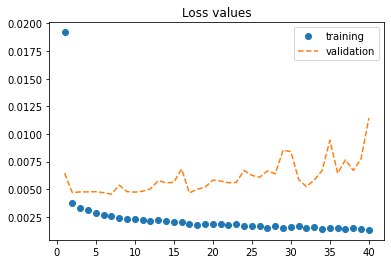

In [15]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
loss_values = history_dict['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,'o', label = 'training')
plt.plot(epochs, val_loss_values,'--', label = 'validation')
plt.legend()
plt.title('Loss values')
plt.show()

In [35]:
model.evaluate(X_test, y_test)

2938/2938 [==============================] - 2s 689us/step - loss: 0.0238 - accuracy: 0.9992


[0.02384350821375847, 0.9992126822471619]

We have overfitting here, let's try a simple model, regularization and dropout methods in order to decrease it.

# Regularization

In [36]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation = 'relu', input_shape = (30,),kernel_regularizer = regularizers.l2(0.01)))
model2.add(layers.Dense(64, activation = 'relu')),
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy') 

history2 = model2.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/20
354/354 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9957 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 2/20
354/354 [==============================] - 1s 1ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9991
Epoch 3/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 4/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 5/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 6/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0055 - val_accuracy: 0.9990
Epoch 7/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9990
Epoch 

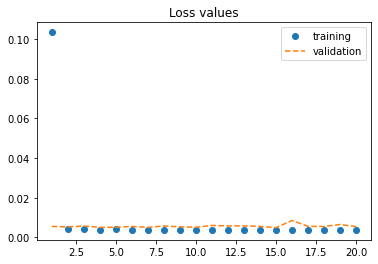

In [37]:
history_dict = history2.history
val_loss_values = history_dict['val_loss']
loss_values = history_dict['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,'o', label = 'training')
plt.plot(epochs, val_loss_values,'--', label = 'validation')
plt.legend()
plt.title('Loss values')
plt.show()

In [38]:
model2.evaluate(X_test, y_test)

2938/2938 [==============================] - 2s 716us/step - loss: 0.0035 - accuracy: 0.9992


[0.003540972014889121, 0.9992126822471619]

This model looks better.

# Dropout

In [39]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation = 'relu', input_shape = (30,))),
model3.add(layers.Dropout(0.5)),
model3.add(layers.Dense(64, activation = 'relu')),
model3.add(layers.Dropout(0.5)),
model3.add(layers.Dense(64, activation = 'relu')),
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy') 

history3 = model3.fit(partial_X_train, partial_y_train, epochs = 40, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/40
354/354 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9952 - val_loss: 0.0107 - val_accuracy: 0.9991
Epoch 2/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9991 - val_loss: 0.0103 - val_accuracy: 0.9991
Epoch 3/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 0.0100 - val_accuracy: 0.9991
Epoch 4/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9993 - val_loss: 0.0089 - val_accuracy: 0.9991
Epoch 5/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 0.9991
Epoch 6/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9994 - val_loss: 0.0093 - val_accuracy: 0.9991
Epoch 7/40
354/354 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9991
Epoch 

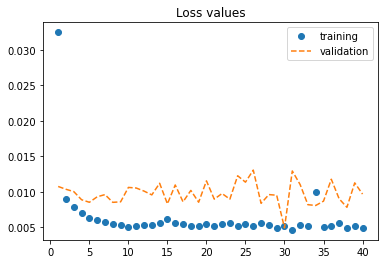

In [40]:
history_dict = history3.history
val_loss_values = history_dict['val_loss']
loss_values = history_dict['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,'o', label = 'training')
plt.plot(epochs, val_loss_values,'--', label = 'validation')
plt.legend()
plt.title('Loss values')
plt.show()

In [41]:
model3.evaluate(X_test, y_test)

2938/2938 [==============================] - 2s 678us/step - loss: 0.0049 - accuracy: 0.9995


[0.0048543838784098625, 0.9994786381721497]

We still have overfitting, let's try building a simple model with less layers and less neurons.

# Simple model

In [42]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation = 'relu', input_shape = (30,)))
model4.add(layers.Dense(4, activation = 'relu'))
model4.add(layers.Dense(1, activation = 'sigmoid'))

model4.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = 'accuracy') 

history4 = model4.fit(partial_X_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (X_val, y_val))

Epoch 1/20
354/354 [==============================] - 1s 1ms/step - loss: 0.1461 - accuracy: 0.9982 - val_loss: 0.0173 - val_accuracy: 0.9982
Epoch 2/20
354/354 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9982 - val_loss: 0.0086 - val_accuracy: 0.9982
Epoch 3/20
354/354 [==============================] - 0s 879us/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0068 - val_accuracy: 0.9982
Epoch 4/20
354/354 [==============================] - 0s 845us/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0062 - val_accuracy: 0.9982
Epoch 5/20
354/354 [==============================] - 0s 862us/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0062 - val_accuracy: 0.9991
Epoch 6/20
354/354 [==============================] - 0s 880us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9991
Epoch 7/20
354/354 [==============================] - 0s 912us/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0060 - val_accuracy: 0.9

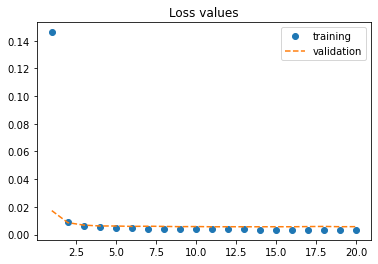

In [43]:
history_dict = history4.history
val_loss_values = history_dict['val_loss']
loss_values = history_dict['loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values,'o', label = 'training')
plt.plot(epochs, val_loss_values,'--', label = 'validation')
plt.legend()
plt.title('Loss values')
plt.show()

In [44]:
model4.evaluate(X_test, y_test)

2938/2938 [==============================] - 2s 664us/step - loss: 0.0030 - accuracy: 0.9994


[0.0030083346646279097, 0.9994041919708252]

It looks like the best models are the simple model and the model with regularization.